In [1]:
# 1. 함수 Import
import gym
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

In [2]:
# 2. 환경 생성 & Hyperparameters 설정
env = gym.make('Taxi-v3')

alpha = 0.1 #Alpha (α) - 학습률(Learning Rate)
gamma = 0.9 # Gamma (γ) - 할인 계수(Discount Factor)
epsilon = 0.0  # 항상 최적의 행동 선택
epsilon_decay = 0.99  # epsilon-greedy 전략에서 사용
epsilon_end = 0.01 #epsilon-greedy 에서 마지막 값


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [3]:
# 3. 함수 정의
# 3-1) Q-Learning 함수 정의
def q_learning(env, alpha, gamma, epsilon, epsilon_decay=0, num_episodes=1000):
    q_table = np.zeros([env.observation_space.n, env.action_space.n])
    total_rewards = []

    for i in range(num_episodes):
        state = env.reset()
        done = False
        total_reward = 0

        while not done:
            if random.uniform(0, 1) < epsilon:
                action = env.action_space.sample()  # 무작위 행동
            else:
                action = np.argmax(q_table[state])  # 최적의 행동 선택

            next_state, reward, done, _ = env.step(action)
            total_reward += reward

            old_value = q_table[state, action]
            next_max = np.max(q_table[next_state])
            new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
            q_table[state, action] = new_value

            state = next_state

            # Epsilon 감소
            if epsilon_decay != 0:
                epsilon = max(epsilon_end, epsilon * epsilon_decay)

        total_rewards.append(total_reward)

    return total_rewards


# 3-2) 시각화 함수
def plot_rewards(rewards, title):
    plt.plot(rewards, label=title)
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.title('Total Rewards Over Episodes')
    plt.legend()

# 3-3) 통계값 리턴 함수
def calculate_statistics(rewards):
    mean_reward = np.mean(rewards)
    median_reward = np.median(rewards)
    max_reward = np.max(rewards)
    min_reward = np.min(rewards)
    std_reward = np.std(rewards)

    return {'Mean': mean_reward, 'Median': median_reward, 'Max': max_reward, 'Min': min_reward, 'Std': std_reward}

In [4]:
#4. 실행
rewards_case1 = q_learning(env, alpha, gamma, epsilon, num_episodes=1000) #Q learning with no epsilon
rewards_case2 = q_learning(env, alpha, gamma, 0.1, num_episodes=1000) # epsilon-greedy
rewards_case3 = q_learning(env, alpha, gamma, 1.0, epsilon_decay, num_episodes=1000) # epsilon-greedy with decay

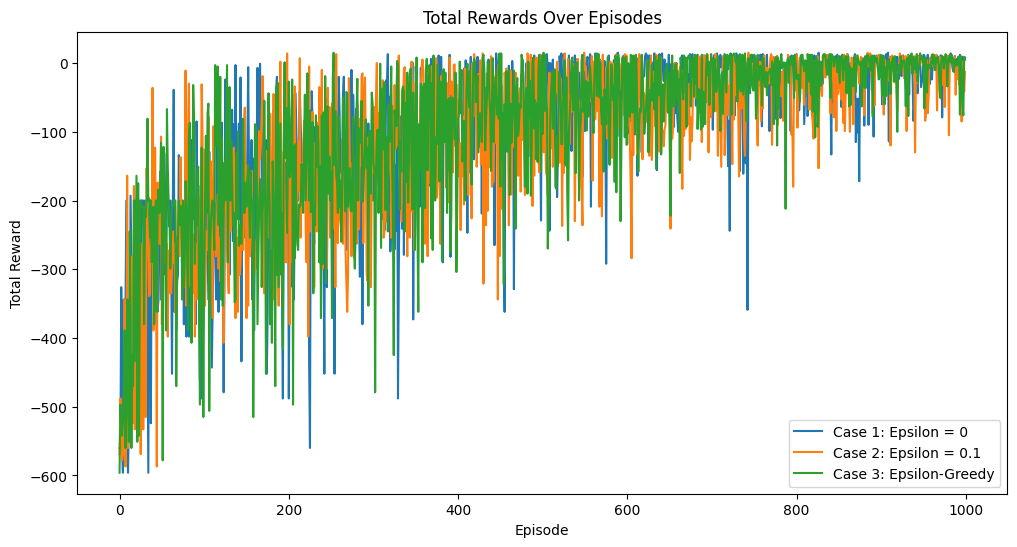

In [5]:
#5 시각화
plt.figure(figsize=(12, 6))
plot_rewards(rewards_case1, "Case 1: Epsilon = 0")
plot_rewards(rewards_case2, "Case 2: Epsilon = 0.1")
plot_rewards(rewards_case3, "Case 3: Epsilon-Greedy")
plt.show()

In [6]:
# 6. 각 케이스별 통계 계산 및 출력
stats_case1 = calculate_statistics(rewards_case1)
stats_case2 = calculate_statistics(rewards_case2)
stats_case3 = calculate_statistics(rewards_case3)

df_stats = pd.DataFrame([stats_case1, stats_case2, stats_case3], index=["Case 1", "Case 2", "Case 3"])
print(df_stats)


           Mean  Median  Max  Min         Std
Case 1  -99.770   -59.0   15 -596  120.018003
Case 2 -110.375   -73.0   15 -587  121.083320
Case 3  -98.056   -58.5   15 -596  118.631635
